In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from Reader import *
from Data_Treatement import *
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/kdiff/1_0/"
media_1 = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/kdiff/"
from matplotlib import colormaps
cm = colormaps['viridis']

In [3]:
time_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','Check_Time')
#time_kdiff001.average(num_bins=50,log_scale=True)
time_kdiff0005 = Data_Treatement(media+'kdiff_0005.hdf','Check_Time')
#time_kdiff0005.average(num_bins=50,log_scale=True)
time_kdiff0005b = Data_Treatement(media+'kdiff_0001.hdf','Check_Time')
#time_kdiff0005b.average(num_bins=50,log_scale=True)
time_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','Check_Time')
#time_kdiff01.average(num_bins=50,log_scale=True)
time_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','Check_Time')

time_kdiff1_1 = Data_Treatement(media_1+'kdiff_1.hdf','Check_Time')
time_kdiff01_1 = Data_Treatement(media_1+'kdiff_01.hdf','Check_Time')
#time_kdiff1.average(num_bins=50,log_scale=True)
times = [time_kdiff0005,time_kdiff0005b,time_kdiff001,time_kdiff01,time_kdiff1,time_kdiff01_1,time_kdiff1_1]
#times = [time_kdiff0005,time_kdiff0005b,time_kdiff1]

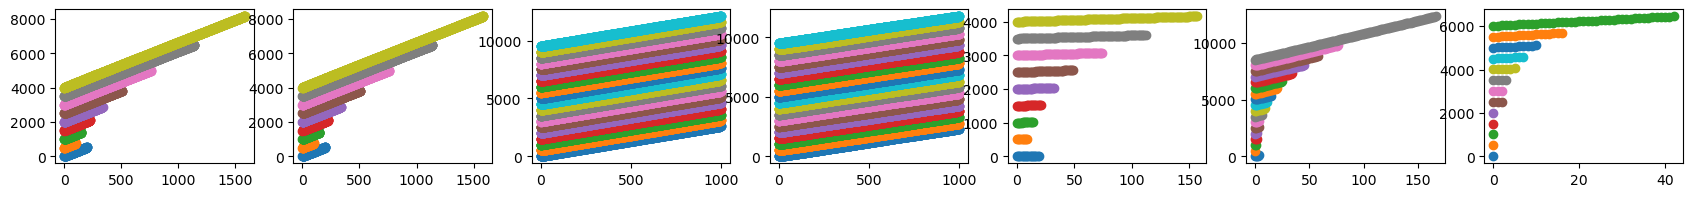

In [4]:
fig,ax = plt.subplots(ncols=len(times),figsize=(len(times)*3,2))
for i,time in enumerate(times):
    for n,interval in enumerate(time.data[0]):
        ax[i].scatter(np.arange(0,interval.shape[0],1),interval+n*500)
#plt.yscale('log')

In [ ]:
kdiff001 = CustomHDF5Reader(media+'kdiff_001.hdf')
kdiff001.open()

In [3]:
arg_kdiff001 = kdiff001.get_header_attributes()
print(arg_kdiff001)

{'ell_tot': 1000, 'Energy': -15, 'kdiff': 0.01, 'seed': 412805, 'Nlinker': 20, 'dimension': 3, 'step_tot': 2000000, 'check_steps': 100000, 'coarse_grained_step': 100, 'cluster_max_distance': (3.0,), 'MSD_args': (), 'ISF_q_norm': (0.1, 10), 'ISF_q_num_sample': (), 'NRG_args': (31.622776601683793, 30, False), 'PCF_max_distance': (1000, 30, False)}


In [4]:
kdiff001.list_measurements(kdiff001.list_groups()[0])

['Check_Time',
 'Coarse_Time',
 'ISF',
 'MSD',
 'MSD_tot',
 'NRG',
 'PCF',
 'PCF_L',
 'cluster',
 'moves_1']

# cluster

In [5]:
clst_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','cluster')
clst_kdiff001.average(num_bins=50,log_scale=True)
clst_kdiff0005 = Data_Treatement(media+'kdiff_0005.hdf','cluster')
clst_kdiff0005.data[:,-2:] = clst_kdiff0005.data[:,-4:-2]
clst_kdiff0005.time[:,-2:] = clst_kdiff0005.time[:,-4:-2]
clst_kdiff0005.average(num_bins=50,log_scale=True)
clst_kdiff0005b = Data_Treatement(media+'kdiff_0001.hdf','cluster')
clst_kdiff0005b.data[:,-2:] = clst_kdiff0005b.data[:,-4:-2]
clst_kdiff0005b.time[:,-2:] = clst_kdiff0005b.time[:,-4:-2]
clst_kdiff0005b.average(num_bins=50,log_scale=True)
clst_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','cluster')
clst_kdiff01.average(num_bins=50,log_scale=True)
clst_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','cluster')
clst_kdiff1.data[:,-4:] = clst_kdiff1.data[:,-8:-4]
clst_kdiff1.time[:,-4:] = clst_kdiff1.time[:,-8:-4]
clst_kdiff1.average(num_bins=50,log_scale=True)

clst_kdiff1_1 = Data_Treatement(media_1+'kdiff_1.hdf','cluster')
clst_kdiff1_1.average(num_bins=30,log_scale=True)
clst_kdiff01_1 = Data_Treatement(media_1+'kdiff_01.hdf','cluster')
clst_kdiff01_1.average(num_bins=30,log_scale=True)

Text(0, 0.5, 'nearest neighbor distance')

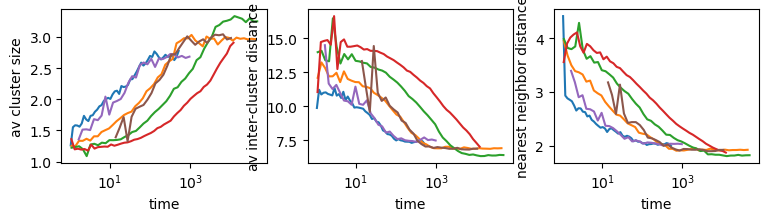

In [14]:
fig,ax = plt.subplots(figsize = (9,2),ncols=3)
for i in range(3):
    ax[i].plot(clst_kdiff1.binned_time,clst_kdiff1.average_data[:,i])
    ax[i].plot(clst_kdiff01.binned_time,clst_kdiff01.average_data[:,i])
    ax[i].plot(clst_kdiff001.binned_time,clst_kdiff001.average_data[:,i])
    ax[i].plot(clst_kdiff0005.binned_time,clst_kdiff0005.average_data[:,i])
    ax[i].plot(clst_kdiff1_1.binned_time,clst_kdiff1_1.average_data[:,i])
    ax[i].plot(clst_kdiff01_1.binned_time,clst_kdiff01_1.average_data[:,i])
    ax[i].set_xscale('log')
    ax[i].set_xlabel('time')
#plt.ylim(-2705,-2680)
ax[0].set_ylabel('av cluster size')
ax[1].set_ylabel('av inter-cluster distance')
ax[2].set_ylabel('nearest neighbor distance')


# NRG

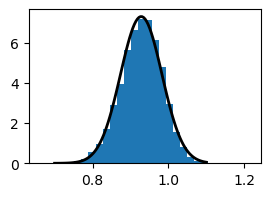

In [48]:
from scipy.stats import norm
plt.figure(figsize=(3,2))
count,bin,ignore = plt.hist(np.concatenate(data_kdiff001.distribution),bins=30,density=True)
mu, sigma = norm.fit(np.concatenate(data_kdiff001.distribution))
x = np.linspace(0.7,1.1, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

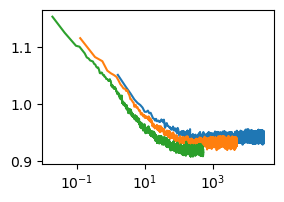

In [21]:
plt.figure(figsize=(3,2))
# import data with 300 processes previous measurement
ST1 = np.load(media+'kdiff_LsV.npy')
ST2 = np.load(media+'kiff_Ls10V.npy')
ST3 = np.load(media+'kiff_Ls100V.npy')
import matplotlib as mpl
import matplotlib.pyplot as plt

# For removing minor ticks when x axis is in log scale
from matplotlib.ticker import NullLocator
ax = plt.gca()
ax.xaxis.set_minor_locator(NullLocator())
N = data_kdiff001.attributes['Nlinker']
L = data_kdiff001.attributes['ell_tot']
E = data_kdiff001.attributes['Energy']
plt.plot(ST1[2:,0],(ST1[2:,1]-Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.plot(ST2[:,0]/10,(ST2[:,1]-  Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.plot(ST3[:,0]/100,(ST3[:,1]-  Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.9,1.1)

In [7]:
nrg_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','NRG')
nrg_kdiff001.average(num_bins=50,log_scale=True)
nrg_kdiff0005 = Data_Treatement(media+'kdiff_0005.hdf','NRG')
nrg_kdiff0005.data[:,-2:] = nrg_kdiff0005.data[:,-4:-2]
nrg_kdiff0005.time[:,-2:] = nrg_kdiff0005.time[:,-4:-2]
nrg_kdiff0005.average(num_bins=50,log_scale=True)
nrg_kdiff0005b = Data_Treatement(media+'kdiff_0001.hdf','NRG')
nrg_kdiff0005b.data[:,-2:] = nrg_kdiff0005b.data[:,-4:-2]
nrg_kdiff0005b.time[:,-2:] = nrg_kdiff0005b.time[:,-4:-2]
nrg_kdiff0005b.average(num_bins=50,log_scale=True)
nrg_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','NRG')
nrg_kdiff01.average(num_bins=50,log_scale=True)
nrg_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','NRG')
nrg_kdiff1.data[:,-4:] = nrg_kdiff1.data[:,-8:-4]
nrg_kdiff1.time[:,-4:] = nrg_kdiff1.time[:,-8:-4]
nrg_kdiff1.average(num_bins=50,log_scale=True)

nrg_kdiff1_1 = Data_Treatement(media_1+'kdiff_1.hdf','NRG')
nrg_kdiff1_1.average(num_bins=50,log_scale=True)
nrg_kdiff01_1 = Data_Treatement(media_1+'kdiff_01.hdf','NRG')
nrg_kdiff01_1.average(num_bins=50,log_scale=True)

nrgs = [nrg_kdiff0005,nrg_kdiff0005b,nrg_kdiff001,nrg_kdiff01,nrg_kdiff1,nrg_kdiff01_1,nrg_kdiff1_1]

In [17]:
for nrg in nrgs:
    print(nrg.attributes)
fmin = -(10**3-20)*np.log(4*np.pi)-15*20
fmax = Fmax(20,10**3,-15)

{'ell_tot': 1000, 'Energy': -15, 'kdiff': 0.0005, 'seed': 50769, 'Nlinker': 20, 'dimension': 3, 'step_tot': 500000, 'check_steps': 20000, 'coarse_grained_step': 100, 'cluster_max_distance': (3.0,), 'MSD_args': (), 'ISF_q_norm': (1.5, 10), 'ISF_q_num_sample': (), 'NRG_args': (31.622776601683793, 30), 'PCF_max_distance': (1000, 30), 'PCF_num_bins': 1.5}
{'ell_tot': 1000, 'Energy': -15, 'kdiff': 0.0005, 'seed': 50769, 'Nlinker': 20, 'dimension': 3, 'step_tot': 500000, 'check_steps': 20000, 'coarse_grained_step': 100, 'cluster_max_distance': (3.0,), 'MSD_args': (), 'ISF_q_norm': (1.5, 10), 'ISF_q_num_sample': (), 'NRG_args': (31.622776601683793, 30), 'PCF_max_distance': (1000, 30), 'PCF_num_bins': 1.5}
{'ell_tot': 1000, 'Energy': -15, 'kdiff': 0.01, 'seed': 412805, 'Nlinker': 20, 'dimension': 3, 'step_tot': 2000000, 'check_steps': 100000, 'coarse_grained_step': 100, 'cluster_max_distance': (3.0,), 'MSD_args': (), 'ISF_q_norm': (0.1, 10), 'ISF_q_num_sample': (), 'NRG_args': (31.622776601683

(0.8, 1.2)

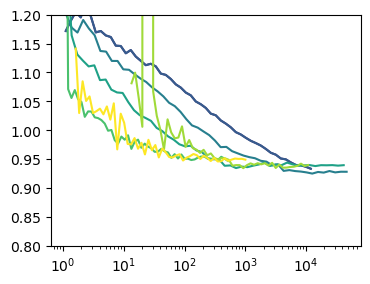

In [23]:
fig,ax = plt.subplots(figsize = (4,3))
for i,nrg in enumerate(nrgs):
    plt.plot(nrg.binned_time,(nrg.average_data-fmin)/(fmax-fmin),color=cm((i+1)/len(nrgs)))
plt.xscale('log')

plt.ylim(0.8,1.2)

# clusters

In [2]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','cluster')
#data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=80,log_scale=True)

Text(0, 0.5, 'nearest neighbor distance')

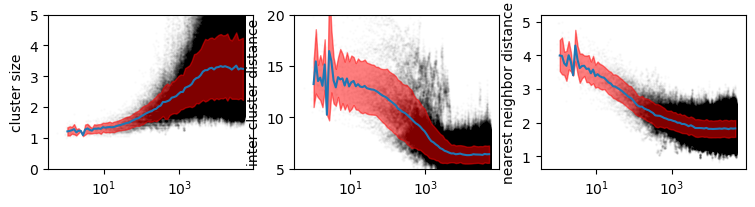

In [6]:
fig,ax = plt.subplots(figsize=(9,2),ncols = 3)
for j in range(3):
    for i in range(data_kdiff001.Nsample):
        ax[j].scatter(data_kdiff001.time[i],data_kdiff001.data[i][:,j],color='black',alpha=0.01,s=1.)
    ax[j].plot(data_kdiff001.binned_time,data_kdiff001.average_data[:,j])
    ax[j].fill_between(data_kdiff001.binned_time,data_kdiff001.average_data[:,j]-data_kdiff001.variance[:,j],data_kdiff001.average_data[:,j]+data_kdiff001.variance[:,j],color='red',alpha=0.5)
    ax[j].set_xscale('log')
ax[0].set_ylim(0.,5)
ax[1].set_ylim(5,20)
ax[0].set_ylabel('cluster size')
ax[1].set_ylabel('inter cluster distance')
ax[2].set_ylabel('nearest neighbor distance')
#ax[0].set_ylim(0)


# MSD
time shift is missing

In [67]:
msd_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','MSD')
msd_kdiff001.average(num_bins=50,log_scale=True)
msd_kdiff0005 = Data_Treatement(media+'kdiff_0005.hdf','MSD')
msd_kdiff0005.data[:,-2:] = msd_kdiff0005.data[:,-4:-2]
msd_kdiff0005.time[:,-2:] = msd_kdiff0005.time[:,-4:-2]
msd_kdiff0005.average(num_bins=50,log_scale=True)
msd_kdiff0005b = Data_Treatement(media+'kdiff_0001.hdf','MSD')
msd_kdiff0005b.data[:,-2:] = msd_kdiff0005b.data[:,-4:-2]
msd_kdiff0005b.time[:,-2:] = msd_kdiff0005b.time[:,-4:-2]
msd_kdiff0005b.average(num_bins=50,log_scale=True)
msd_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','MSD')
msd_kdiff01.average(num_bins=50,log_scale=True)
msd_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','MSD')
msd_kdiff1.data[:,-4:] = msd_kdiff1.data[:,-8:-4]
msd_kdiff1.time[:,-4:] = msd_kdiff1.time[:,-8:-4]
msd_kdiff1.average(num_bins=50,log_scale=True)


msds = [msd_kdiff0005,msd_kdiff0005b,msd_kdiff001,msd_kdiff01,msd_kdiff1]

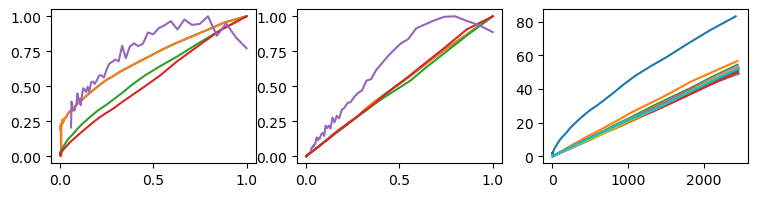

In [72]:
fig,ax = plt.subplots(figsize=(9,2),ncols=3)
for n,msd in enumerate(msds):    
    ax[0].plot(msd.binned_time[0]/max(msd.binned_time[0]),(msd.average_data[0]/max(msd.average_data[0])))
for n,msd in enumerate(msds):    
    ax[1].plot(msd.binned_time[-1]/max(msd.binned_time[-1]),msd.average_data[-1]/max(msd.average_data[-1]))
for i in range(msds[2].binned_time.shape[0]):
    ax[2].plot(msds[2].binned_time[i],msds[2].average_data[i])

# ISF

In [3]:
isf_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','ISF')
isf_kdiff001.average(num_bins=50,log_scale=False)
isf_kdiff0005 = Data_Treatement(media+'kdiff_0005.hdf','ISF')
isf_kdiff0005.data[:,-2:] = isf_kdiff0005.data[:,-4:-2]
isf_kdiff0005.time[:,-2:] = isf_kdiff0005.time[:,-4:-2]
isf_kdiff0005.average(num_bins=50,log_scale=False)
isf_kdiff0005b = Data_Treatement(media+'kdiff_0001.hdf','ISF')
isf_kdiff0005b.data[:,-2:] = isf_kdiff0005b.data[:,-4:-2]
isf_kdiff0005b.time[:,-2:] = isf_kdiff0005b.time[:,-4:-2]
isf_kdiff0005b.average(num_bins=50,log_scale=False)
isf_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','ISF')
isf_kdiff01.average(num_bins=50,log_scale=False)
isf_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','ISF')
isf_kdiff1.data[:,-4:] = isf_kdiff1.data[:,-8:-4]
isf_kdiff1.time[:,-4:] = isf_kdiff1.time[:,-8:-4]
isf_kdiff1.average(num_bins=50,log_scale=False)

isf_kdiff1_1 = Data_Treatement(media_1+'kdiff_1.hdf','ISF')
isf_kdiff1_1.average(num_bins=50,log_scale=False)
isf_kdiff01_1 = Data_Treatement(media_1+'kdiff_01.hdf','ISF')
isf_kdiff01_1.average(num_bins=50,log_scale=False)

isfs = [isf_kdiff0005,isf_kdiff0005b,isf_kdiff001,isf_kdiff01,isf_kdiff1,isf_kdiff01_1,isf_kdiff1_1]
labels = ['0.0005','0.0005','0.01','0.1','1','0.1','1.']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


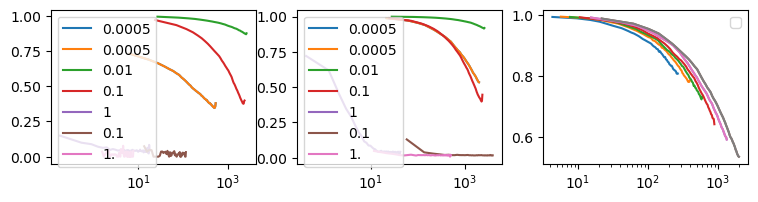

In [6]:
fig,ax = plt.subplots(figsize=(9,2),ncols=3)
for n,isf in enumerate(isfs):    
    ax[0].plot(isf.binned_time[0],(isf.average_data[0]),label=labels[n])
for n,isf in enumerate(isfs):    
    ax[1].plot(isf.binned_time[-1],isf.average_data[-1],label=labels[n])
N = 1
for i in range(1,isfs[N].binned_time.shape[0]):
    ax[2].plot(isfs[N].binned_time[i],isfs[N].average_data[i])
for i in range(3):
    ax[i].set_xscale('log')
    ax[i].legend()

# PCF/PCF_L

In [4]:
import importlib
import Data_Treatement
importlib.reload(Data_Treatement)
from Data_Treatement import *

In [62]:
pcf_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','PCF')
pcf_kdiff001.average(num_bins=30,log_scale=False)
pcf_kdiff0005b = Data_Treatement(media+'kdiff_0005.hdf','PCF')
pcf_kdiff0005b.data[:,-2:] = pcf_kdiff0005b.data[:,-4:-2]
pcf_kdiff0005b.time[:,-2:] = pcf_kdiff0005b.time[:,-4:-2]
pcf_kdiff0005b.average(num_bins=30,log_scale=False)
pcf_kdiff0005 = Data_Treatement(media+'kdiff_0001.hdf','PCF')
pcf_kdiff0005.data[:,-2:] = pcf_kdiff0005.data[:,-4:-2]
pcf_kdiff0005.time[:,-2:] = pcf_kdiff0005.time[:,-4:-2]
pcf_kdiff0005.average(num_bins=30,log_scale=False)
pcf_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','PCF')
pcf_kdiff01.average(num_bins=30,log_scale=False)
pcf_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','PCF')
pcf_kdiff1.data[:,-4:] = pcf_kdiff1.data[:,-8:-4]
pcf_kdiff1.time[:,-4:] = pcf_kdiff1.time[:,-8:-4]
pcf_kdiff1.average(num_bins=30,log_scale=False)
pcfs = [pcf_kdiff0005,pcf_kdiff0005b,pcf_kdiff001,pcf_kdiff01,pcf_kdiff1]
labels = ['0.0005','0.0005','0.01','0.1','1']

In [41]:
pcf_kdiff001.attributes

{'ell_tot': 1000,
 'Energy': -15,
 'kdiff': 0.01,
 'seed': 412805,
 'Nlinker': 20,
 'dimension': 3,
 'step_tot': 2000000,
 'check_steps': 100000,
 'coarse_grained_step': 100,
 'cluster_max_distance': (3.0,),
 'MSD_args': (),
 'ISF_q_norm': (0.1, 10),
 'ISF_q_num_sample': (),
 'NRG_args': (31.622776601683793, 30, False),
 'PCF_max_distance': (1000, 30, False)}

In [46]:
from scipy.special import erfc
Pmeet = lambda r,L=10**3,a=1 : 3*a**2*erfc(np.sqrt(3/2)*r/(np.sqrt(a*L)))/(2*L*np.pi*r)
ell_tot = 10**3
Nlinker = 20
Vpolymer = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
rho = Nlinker/Vpolymer

max_distance,num_bins = np.sqrt(1000),30
def histogram_float(*args, **kwargs):
    counts, bin_edges = np.histogram(*args, **kwargs)
    return counts.astype(float), bin_edges
counts,bin_edges = histogram_float([],bins=num_bins,range=(0,max_distance))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_widths = bin_edges[1:] - bin_edges[:-1]
#shell_volumes = (4 / 3) * np.pi * ((bin_centers + bin_widths)**3 - bin_centers**3)
shell_volumes = 4/3 * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)

Pmeets = Pmeet(bin_centers,ell_tot/(Nlinker+2))


for pcf in pcfs:
    print(np.sum(pcf.average_data[-1]*shell_volumes*bin_centers))
print(np.sum(Pmeets*shell_volumes*bin_centers))

7.896670992513113
7.896670992513113
5.370295376303039
5.762733263684576
6.668629419769321
4.1791034851006055


(1e-09, 0.05)

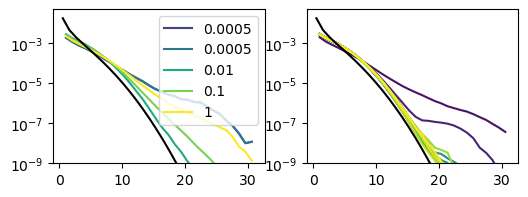

In [66]:
fig,ax = plt.subplots(figsize = (6,2),ncols=2)
for n,pcf in enumerate(pcfs):
    ax[0].plot(pcf.binned_time[-1],pcf.average_data[-1],label=labels[n],color=cm((n+1)/len(pcfs)))
pcf = pcfs[2]
for i in range(pcf.binned_time.shape[0]):
    ax[1].plot(pcf.binned_time[i],pcf.average_data[i],color=cm((i+1)/pcf.binned_time.shape[0]))

ax[0].legend()
ax[0].plot(bin_centers,Pmeets,color='black')
ax[0].set_yscale('log')
ax[0].set_ylim(10**-9,5*10**-2)
ax[1].plot(bin_centers,Pmeets,color='black')
ax[1].set_yscale('log')
ax[1].set_ylim(10**-9,5*10**-2)

In [98]:
pcf_l_kdiff001 = Data_Treatement(media+'kdiff_001.hdf','PCF_L')
pcf_l_kdiff001.average(num_bins=30,log_scale=False)
pcf_l_kdiff0005b = Data_Treatement(media+'kdiff_0005.hdf','PCF_L')
pcf_l_kdiff0005b.data[:,-2:] = pcf_kdiff0005b.data[:,-4:-2]
pcf_l_kdiff0005b.time[:,-2:] = pcf_kdiff0005b.time[:,-4:-2]
pcf_l_kdiff0005b.average(num_bins=30,log_scale=False)
pcf_l_kdiff0005 = Data_Treatement(media+'kdiff_0001.hdf','PCF_L')
pcf_l_kdiff0005.data[:,-2:] = pcf_kdiff0005.data[:,-4:-2]
pcf_l_kdiff0005.time[:,-2:] = pcf_kdiff0005.time[:,-4:-2]
pcf_l_kdiff0005.average(num_bins=30,log_scale=False)
pcf_l_kdiff01 = Data_Treatement(media+'kdiff_01.hdf','PCF_L')
pcf_l_kdiff01.average(num_bins=30,log_scale=False)
pcf_l_kdiff1 = Data_Treatement(media+'kdiff_1.hdf','PCF_L')
pcf_l_kdiff1.data[:,-4:] = pcf_kdiff1.data[:,-8:-4]
pcf_l_kdiff1.time[:,-4:] = pcf_kdiff1.time[:,-8:-4]
pcf_l_kdiff1.average(num_bins=30,log_scale=False)
pcf_ls = [pcf_l_kdiff0005,pcf_l_kdiff0005b,pcf_l_kdiff001,pcf_l_kdiff01,pcf_l_kdiff1]
labels = ['0.0005','0.0005','0.01','0.1','1']

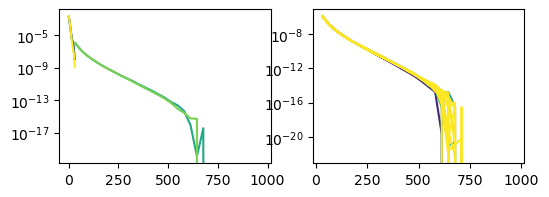

In [100]:
fig,ax = plt.subplots(figsize = (6,2),ncols=2)
for n,pcf in enumerate(pcf_ls):
    ax[0].plot(pcf.binned_time[-1],pcf.average_data[-1],label=labels[n],color=cm((n+1)/len(pcfs)))
pcf_l = pcf_ls[2]
for i in range(pcf_l.binned_time.shape[0]):
    ax[1].plot(pcf_l.binned_time[i],pcf_l.average_data[i],color=cm((i+1)/pcf.binned_time.shape[0]))
ax[0].set_yscale('log')
ax[1].set_yscale('log')